<img src="images/Picture0.png" width=200x />

# Notebook 14 - Pandas

## Instructions

Pandas is a Python package which offers data structures and operations for manipulating numerical tables and time series. The term pandas is derived from "panel data," an econometrics term describing a particular type of dataset.

In this notebook, you will learn to:

### Credits


In [7]:
import pandas as pd

## Importing data

The primary way you'll likely use `pandas` is explore and manipulate data in tables, often data you did not create. Pandas can read in data from a variety of formats. A common data format is .csv, which stands for "comma separated values". Data can also be imported from .json files, Excel files, SQL files, and more!

In [12]:
file = "data/cereal.csv" #this finds the file in the "data" folder (assuming "data" is in the same folder as your notebook)
cereal_df = pd.read_csv(file,sep = ';')

Uh, oh... What went wrong? Open the file in a text editor and take a look at it. On this page, you can go to File > Open... to go back to Dashboard view, then click on the file to open it in Jupyter's text editor.

At the very end of the error message, it tells us we experienced a `ParserError`. It says "`Expected 1 fields in line 30, saw 3`". Can you see what the issue is?

To fix the issue, you'll need to change the value of the parameter `sep` when calling `pd.read_csv()`.

### Exercise

Fix the data import.

In [90]:
cereal_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,105.714286,2.471429,0.971429,158.928571,2.110000,14.600000,6.771429,93.900000,28.571429,2.200000,1.024286,0.819714,42.819720
std,19.229463,1.045646,1.006809,86.422005,2.463187,4.323512,4.453207,72.519093,23.423370,0.827078,0.151117,0.239686,14.523044
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,126.250000,0.000000,12.000000,3.000000,40.000000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.000000,1.000000,180.000000,1.500000,14.000000,6.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253086
75%,110.000000,3.000000,1.000000,210.000000,3.000000,17.000000,11.000000,113.750000,25.000000,3.000000,1.000000,1.000000,50.812544
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


### Exercise

Here are a few commands you can use to get information about your database. Try them out on ```cereal_df```.

* ```.head()```
* ```.tail()```
* ```.info()```
* ```.shape```
* ```.describe()```

Tip: Don't wrap the call in a print statement for a nicer output. Eg. use ```cereal_df.head()``` rather than ```print(cereal_df.head())```.

In [28]:
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,NaN,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


## Cleaning data

Often, there will be issues with your data that needs to be fixed before it can be used. `Pandas` offers many tools to help.

### Exercise

Did you notice the first row in the in the table? Look up how to skip rows when using ```.read_csv()``` and reload the dataset. Be sure not to remove the column names.

In [80]:
cereal_df = pd.read_csv(file,skiprows=[1],sep = ';')

In [81]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       68 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    70 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


#### Missing data

Look at `cereal_df.info()` again. It indicates that we have missing data in two categories.

The first is `'mfr'`, the manufacturer. Let's replace any missing values with `'U'` for "unknown".

In [85]:
cereal_df = cereal_df.fillna({'mfr': 'U'})
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    70 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


### Exercise

For the column `'rating'`, there's not an obvious choice for replacing the missing values. Instead, let's drop those entries. You'll need to look up how to do this.

In [91]:
cereal_df = cereal_df.dropna()
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      70 non-null     object 
 1   mfr       70 non-null     object 
 2   type      70 non-null     object 
 3   calories  70 non-null     int64  
 4   protein   70 non-null     int64  
 5   fat       70 non-null     int64  
 6   sodium    70 non-null     int64  
 7   fiber     70 non-null     float64
 8   carbo     70 non-null     float64
 9   sugars    70 non-null     int64  
 10  potass    70 non-null     int64  
 11  vitamins  70 non-null     int64  
 12  shelf     70 non-null     int64  
 13  weight    70 non-null     float64
 14  cups      70 non-null     float64
 15  rating    70 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.3+ KB


## A note about in-place operations

The methods `.fillna()` and `.dropna()` have a boolean parameter `inplace`.

In fact, pandas has many operations that can be performed "in-place". This means that calling the function directly alters the existing object and that the function does not return anything. In contrast, "normal" operations make a copy of the object, alter that object, and then return the altered object. 

This is an important distinction. We'll illustrate it by calling a function to drop a column from our dataframe.

In [100]:
#let's make a copy of our dataframe so we don't mess up what we have currently
cereal_copy = cereal_df.copy()

In [101]:
cereal_copy.drop(["weight"], axis = 1, inplace = False)
cereal_copy.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

Notice that ```cereal_copy``` still has the column ```weight```. This is because the function did not alter the dataframe directly. We need to assign the result of the function to some variable.

In [104]:
cereal_copy_altered = cereal_copy.drop(["weight"], axis = 1, inplace = False)
cereal_copy_altered.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'cups', 'rating'],
      dtype='object')

Now contrast this with the in-place version of the function.

In [106]:
cereal_copy.drop(["shelf"], axis = 1, inplace = True)
cereal_copy.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,1.0,1.00,33.983679
2,All-Bran,U,C,70,4,1,260,9.0,7.0,5,320,25,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,1.0,0.75,34.384843


The in-place function directly updated ```cereal_copy```. 

*This is a great way to save memory, especially when dealing with large databases, however it can make it easier for mistakes to go unnoticed (if you forget to add ```inplace = True``` for example).*

Finally, observe what happens if you try to assign the output of an in-place operation to a variable.

In [107]:
cereal_copy = cereal_df.drop(["cups"], axis = 1, inplace = True)
cereal_copy.head()

AttributeError: 'NoneType' object has no attribute 'head'

Do you understand what went wrong?

In [108]:
type(cereal_copy)

NoneType

## More data cleaning

Let's replace the letters in the `mfr` column with the actual names of the brands.

In [113]:
cereal_df.replace({"mfr":"K"}, "Kelloggs", inplace = True)
#cereal_df.head()

There are several allowed input formats to `.replace()`.

In [114]:
cereal_df = cereal_df.replace({"mfr" : {"R" : "Raiston"}})
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,All-Bran,U,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
4,Almond Delight,Raiston,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,34.384843


### Exercise

Finish replacing the values in the `mfr` column with the following values:

* `'U'` --> `'Unknown'`
* `'N'` --> `'Nabisco'`
* `'R'` --> `'Raiston'`
* `'G'` --> `'General Mills'`
* `'P'` --> `'Post'`
* `'A'` --> `'American Home Products'`

Hint: You can use `cereal_df.replace({"mfr" : {"K" : "Kelloggs", "Q" : "Quaker"}})` to replace multiple values at once.

In [118]:
cereal_df.replace({'mfr':{'U' : 'Unknown', 'N' : 'Nabisco', 'R' : 'Raiston', 'G' : 'General Mills', 'P' : 'Post', 'A' : 'American Home Products'}}, inplace = True)
cereal_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,All-Bran,Unknown,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
4,Almond Delight,Raiston,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,34.384843


Finally, let's update some of the column names to include measurement units.

In [120]:
cereal_df.rename(columns={"protein": "protein (g)", "sodium": "sodium (mg)"}, inplace = True)
cereal_df.head()

,name,mfr,type,calories,protein (g),fat,sodium (mg),fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,All-Bran,Unknown,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
4,Almond Delight,Raiston,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,34.384843


### Exercise

Update `'fat'` to `'fat (g)'` and `'potass'` to `'potass (mg)'`.

In [121]:
cereal_df.rename(columns = {'fat' : 'fat(g)', 'potass' : 'potass(mg)'})

,name,mfr,type,calories,protein (g),fat(g),sodium (mg),fiber,carbo,sugars,potass(mg),vitamins,shelf,weight,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,33.983679
2,All-Bran,Unknown,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
4,Almond Delight,Raiston,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Total Whole Grain,General Mills,C,100,3,1,200,3.0,16.0,3,110,100,3,1.0,46.658844
72,Triples,General Mills,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,39.106174
73,Trix,General Mills,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,27.753301
74,Wheat Chex,Raiston,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,49.787445


### Extracting rows and columns

Extracting columns from a dataframe is quite easy.

In [122]:
fiber = cereal_df["fiber"]
print(fiber)

0     10.0
1      2.0
2      9.0
3     14.0
4      1.0
      ... 
71     3.0
72     0.0
73     0.0
74     3.0
76     1.0
Name: fiber, Length: 70, dtype: float64


We can easily convert a column to a Numpy array for use with Numpy and any other packages that utilize Numpy arrays.

In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [124]:
fiber_array = fiber.to_numpy()
print(fiber_array)

[10.   2.   9.  14.   1.   1.5  1.   2.   4.   5.   0.   2.   0.   2.
  0.   0.   1.   1.   0.   4.   1.   1.   1.   1.   1.   3.   5.   0.
  0.   0.   3.   3.   3.   1.   1.5  0.   1.   2.   0.   2.   0.   0.
  3.   3.   2.   0.   3.   1.5  6.   1.   0.   1.   2.   2.7  5.   2.5
  2.   0.   0.   3.   4.   3.   3.   0.   4.   3.   0.   0.   3.   1. ]


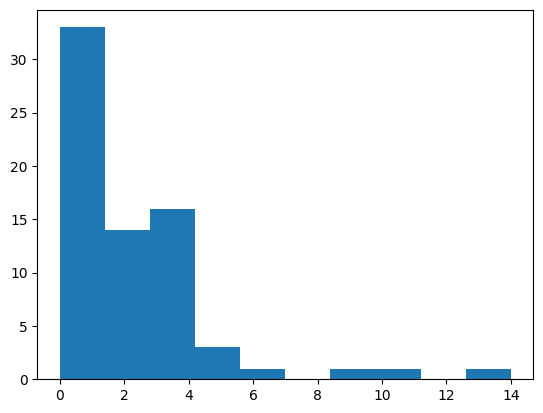

In [125]:
plt.hist(fiber_array);

Some functions already have built-in pandas functionality, but converting to a numpy array is a safer option.

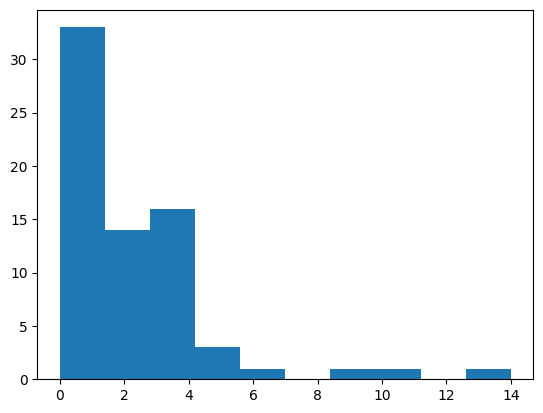

In [126]:
plt.hist(fiber);

We can extract a row using its index.

In [148]:
row_3 = cereal_df.iloc[2:10,:] #2 is the index of the row we want to extract
print(row_3)

                         name       mfr type  calories  protein (g)  fat  \
65  Shredded Wheat spoon size   Nabisco    C        90            3    0   
0                   100% Bran   Nabisco    C        70            4    1   
63             Shredded Wheat   Nabisco    C        80            2    0   
20     Cream of Wheat (Quick)   Nabisco    H       100            3    0   
55               Puffed Wheat         Q    C        50            2    0   
54                Puffed Rice         Q    C        50            1    0   
50          Nutri-grain Wheat  Kelloggs    C        90            3    0   
2                    All-Bran   Unknown    C        70            4    1   

    sodium (mg)  fiber  carbo  sugars  potass  vitamins  shelf  weight  \
65            0    3.0   20.0       0     120         0      1    1.00   
0           130   10.0    5.0       6     280        25      3    1.00   
63            0    3.0   16.0       0      95         0      1    0.83   
20           80    

In [150]:
cereal_df.loc()

### Sort and filter

Here are some ways we can reorganize our dataframe.

In [151]:
cereal_df.sort_values(by=["rating"], ascending = False, inplace = True)
cereal_df.head(10)

,name,mfr,type,calories,protein (g),fat,sodium (mg),fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,93.704912
64,Shredded Wheat 'n'Bran,Nabisco,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,74.472949
65,Shredded Wheat spoon size,Nabisco,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,72.801787
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,68.402973
63,Shredded Wheat,Nabisco,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,68.235885
20,Cream of Wheat (Quick),Nabisco,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,64.533816
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,63.005645
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,60.756112
50,Nutri-grain Wheat,Kelloggs,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,59.642837
2,All-Bran,Unknown,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,59.425505


To filter, we can create a "mask", an array of the same size as our object, with entries `True` or `False` depending on whether a certain condition is met.

In [155]:
mask = (cereal_df["sodium (mg)"] > 100)
mask

3      True
64    False
65    False
0      True
63    False
      ...  
14     True
18     True
35     True
12     True
10     True
Name: sodium (mg), Length: 70, dtype: bool

Then we can use the mask to filter the dataframe.

In [156]:
cereal_high_sodium = cereal_df[mask]
cereal_high_sodium.head()

,name,mfr,type,calories,protein (g),fat,sodium (mg),fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,93.704912
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,68.402973
50,Nutri-grain Wheat,Kelloggs,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,59.642837
2,All-Bran,Unknown,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,59.425505
33,Grape-Nuts,Post,C,110,3,0,170,3.0,17.0,3,90,25,3,1.0,53.371007


### Exercise

Create a new dataframe from `cereal_df` containing only entries with `'mfr'` equal to `'Kelloggs'`.

In [158]:
mask = (cereal_df['mfr'] == 'Kelloggs')
cereal_df[mask]

,name,mfr,type,calories,protein (g),fat,sodium (mg),fiber,carbo,sugars,potass,vitamins,shelf,weight,rating
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,93.704912
50,Nutri-grain Wheat,Kelloggs,C,90,3,0,170,3.0,18.0,2,90,25,3,1.00,59.642837
26,Frosted Mini-Wheats,Kelloggs,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,58.345141
60,Raisin Squares,Kelloggs,C,90,2,0,0,2.0,15.0,6,110,25,3,1.00,55.333142
16,Corn Flakes,Kelloggs,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,45.863324
53,Product 19,Kelloggs,C,100,3,0,320,1.0,20.0,3,45,100,3,1.00,41.503540
28,Fruitful Bran,Kelloggs,C,120,3,0,240,5.0,14.0,12,190,25,3,1.33,41.015492
62,Rice Krispies,Kelloggs,C,110,2,0,290,0.0,22.0,3,35,25,1,1.00,40.560159
19,Cracklin' Oat Bran,Kelloggs,C,110,3,3,140,4.0,10.0,7,160,25,3,1.00,40.448772
58,Raisin Bran,Kelloggs,C,120,3,1,210,5.0,14.0,12,240,25,2,1.33,39.259197


<hr>
<font face="verdana" style="font-size:30px" color="blue">---------- Optional Advanced Material ----------</font>

We've barely scratched the surface of pandas's functionality. If there's something you want to do with your dataframe, there is probably a pandas function to help. Here are a few additional common functions you can explore if you have the time:
* `pd.DataFrame.apply()` (you can call this function by adding `.apply()` to the end of a `DataFrame`, as we did in many of the cells above)
* `pd.DataFrame.corr()`
* `pd.DataFrame.query()`
* `pd.DataFrame.sample()`

## Additional Exercise 1

Can you make a separate dataframe with only the highest rated cereal from each mfr group? (Hint: You would want to use ```pd.DataFrame.groupby()```.)

## Additional Exercise 2

Can you calculate the absolute difference between the rating of each cereal and that of the highest rated cereal from each mfr group? Call the column with the absolute difference, 'diff'. (Hint: You would want to use ```pd.DataFrame.merge()```.)

## Additional Exercise 3

Make a list out of CAPITALIZED column names for the cereal_df dataframe. (Hint: Use ```df.columns```.)